# The Embedding layer is defined as the first hidden layer of a network. It must specify 3 arguments

### input_dim: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.
### output_dim: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.
### input_length: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.

In [ ]:
# https://drive.google.com/file/d/1bWE0Zb-QTxyC5DhGIViFPR42XurWi3lG/view?usp=share_link
# 

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!cp "/content/drive/MyDrive/20220821-Python-第四階段-Sun/chap28-Solution-1st reply of customer email/CH48.Keras_Imdb_Introduce活用案例研究/glove.6B.200d.txt" .

Mounted at /content/drive


In [2]:
from google.colab import drive
drive.flush_and_unmount()

In [3]:
# 注意要改成200d 檔案
# # https://nlp.stanford.edu/data/glove.6B.zip
glove = []
with open('glove.6B.200d.txt', encoding='utf-8') as f: 
    glove = f.readlines()

In [ ]:
#dict( [ (g.split()[0], np.array(g.split()[1:]).astype(np.float32) ) for g in glove] )

In [4]:
# 轉字典方式
{'the': [-0.038194, -0.24487]}
dict( [ ('the', [-0.038194, -0.24487]) , ('that', [-0.038194, -0.24487]) ] )

{'the': [-0.038194, -0.24487], 'that': [-0.038194, -0.24487]}

In [ ]:
# dict([ (glove[0].split()[0] , np.array(glove[0].split()[1:]).astype(np.float32) )])

In [5]:
import numpy as np
dict([( glove[-1].split()[0] , np.array(glove[-1].split()[1:]).astype(np.float32))])

{'sandberger': array([-5.1113e-01, -4.7518e-01,  2.2871e-01,  8.6524e-03, -4.3737e-01,
        -2.8747e-01,  2.3416e-01, -2.0332e-02,  5.0697e-01, -2.4367e-01,
        -2.8646e-01, -2.4133e-02, -9.6845e-06,  4.8092e-02, -2.4467e-01,
        -1.2121e-01,  1.3644e-01, -1.6190e-01,  9.9349e-02,  3.6545e-02,
        -3.1657e-02, -8.4172e-01,  2.3022e-01,  3.0332e-02, -6.7638e-01,
        -2.9399e-01,  1.3298e-01, -3.7917e-02, -1.0970e-01,  2.6541e-03,
        -4.6669e-01,  1.2329e-01, -4.0373e-03, -2.8782e-01, -1.6733e-01,
         2.0938e-01,  4.9163e-01, -6.0818e-02,  1.4326e-01, -1.3628e-01,
        -1.5650e-01, -8.3060e-02, -8.5820e-02, -1.9864e-01,  3.6016e-01,
        -1.6752e-01, -6.4389e-03,  2.3173e-01, -1.6636e-01, -1.7120e-01,
         1.8400e-01, -5.2889e-01, -7.0440e-02, -3.7772e-01, -6.6473e-02,
         3.8519e-01,  2.6262e-01, -3.9148e-02, -2.8182e-01, -1.6908e-01,
        -4.9491e-01, -1.4138e-01,  4.1732e-01, -6.8889e-02,  1.0125e-01,
         1.8499e-02, -6.6256e-02,  1.

In [6]:
import numpy as np
glove_embedded = dict([ ( line.split()[0], np.array(line.split()[1:], dtype='float32') ) for line in glove])

In [7]:
glove_embedded['sashimi'].shape

(200,)

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
glove_embedded['sushi'] , glove_embedded['sashimi']
print(np.array(cosine_similarity(glove_embedded['sushi'].reshape(1,-1), glove_embedded['sashimi'].reshape(1,-1))).ravel())
print(np.array(cosine_similarity(glove_embedded['sushi'].reshape(1,-1), glove_embedded['dumping'].reshape(1,-1))).ravel())
print(np.array(cosine_similarity(glove_embedded['korea'].reshape(1,-1), glove_embedded['taiwan'].reshape(1,-1))).ravel())

[0.748392]
[0.10523849]
[0.56847763]


In [9]:
# "sushi" and "sashimi"
glove_embedded['sushi'].reshape(1,-1)

array([[ 1.3063e+00,  2.7041e-02, -2.8848e-01,  4.5606e-02,  2.2648e-01,
         5.6609e-02,  7.0203e-02,  1.6838e-01,  6.2177e-02, -5.7221e-01,
         2.5745e-01,  2.9531e-02,  6.4711e-01, -1.9014e-02, -1.4216e+00,
         4.1880e-01, -7.3317e-01, -3.0577e-01,  3.0034e-01,  5.1285e-02,
        -1.4067e-01,  4.0582e-01,  7.0484e-01,  4.3530e-01,  3.2264e-01,
         4.2139e-01,  4.7226e-01, -6.5450e-01,  4.6333e-01, -4.2686e-02,
         3.3023e-01,  8.0035e-02, -2.3187e-01, -2.2415e-01, -3.9139e-01,
         7.9210e-01, -9.0528e-02, -9.7870e-02, -1.4352e-01,  5.3898e-01,
         8.4313e-01,  4.3806e-01,  5.2112e-01, -2.8653e-02, -4.6791e-01,
         4.0025e-01,  1.0486e+00,  5.7487e-01,  1.6432e-01,  3.4999e-01,
         1.2073e-01,  6.3312e-01, -2.0321e-01,  4.7966e-01,  1.5924e-01,
        -3.9683e-01,  1.1370e-01, -6.5981e-01,  2.8641e-01,  6.9742e-01,
         6.0062e-02,  5.3755e-01, -5.3280e-01, -3.2450e-01, -1.3980e-01,
        -7.0719e-01, -9.3425e-02, -6.0529e-01,  4.9

In [10]:
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.python.keras.layers.embeddings import Embedding 
# define documents
docs = ['Well done!',
        'Good work',
        'Great effort',
        'nice work',
        'Excellent!',
        'Weak',
        'Poor effort!',
        'not good',
        'poor work',
        'Could have done better.']
# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0])
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
t.word_index


{'work': 1,
 'done': 2,
 'good': 3,
 'effort': 4,
 'poor': 5,
 'well': 6,
 'great': 7,
 'nice': 8,
 'excellent': 9,
 'weak': 10,
 'not': 11,
 'could': 12,
 'have': 13,
 'better': 14}

In [11]:
# 範例
# run 
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
# 驗證 token.word_index(總字個數) <= num_words(單字向量長度)
corpus =['Lewis Yang', 'Ada-Kuo', "Julia Li and BoBo Yang", 'Ada Yang']
token = Tokenizer()
token.fit_on_texts(corpus)
#print(dir(token))
print('\n')
print('每一字頻率\n',token.word_counts)
print('每一字代碼 started from 1\n',token.word_index)
print('每一句話轉代碼\n', token.texts_to_sequences( corpus[1].lower().split() ) )
print('每一句話的字轉矩陣\n', token.texts_to_matrix( corpus[1].lower().split() ) )
print('每一字轉矩陣長度',token.num_words)
print('多少數據',token.document_count)
print('補齊數量',sequence.pad_sequences(  token.texts_to_sequences( corpus[1].lower().split() ) ,  maxlen=4) )



每一字頻率
 OrderedDict([('lewis', 1), ('yang', 3), ('ada', 2), ('kuo', 1), ('julia', 1), ('li', 1), ('and', 1), ('bobo', 1)])
每一字代碼 started from 1
 {'yang': 1, 'ada': 2, 'lewis': 3, 'kuo': 4, 'julia': 5, 'li': 6, 'and': 7, 'bobo': 8}
每一句話轉代碼
 [[2, 4]]
每一句話的字轉矩陣
 [[0. 0. 1. 0. 1. 0. 0. 0. 0.]]
每一字轉矩陣長度 None
多少數據 4
補齊數量 [[0 0 2 4]]


In [12]:
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)

[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]


In [13]:
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]


In [14]:
embeddings_index = glove_embedded
print('Loaded %s word vectors.' % len(embeddings_index))


Loaded 400000 word vectors.


In [15]:
for word, i in t.word_index.items():
	print(word, i)
	

work 1
done 2
good 3
effort 4
poor 5
well 6
great 7
nice 8
excellent 9
weak 10
not 11
could 12
have 13
better 14


In [16]:
embeddings_index.get('better')

array([ 2.8758e-01,  4.1002e-01, -1.6365e-01,  3.4996e-01, -1.5445e-01,
       -3.0822e-01, -7.9037e-01, -1.2045e-01,  2.8549e-01,  4.5915e-01,
       -1.2851e-01,  1.9657e-01, -1.4273e-01, -2.6366e-01,  2.1048e-01,
        6.1050e-01,  6.0025e-02,  2.6559e-01,  2.9183e-01, -1.6671e-01,
        2.6403e-01,  2.9983e+00, -9.1205e-02,  1.2911e-01,  2.3796e-01,
       -1.7579e-01,  4.5706e-01,  1.7302e-01, -1.1643e-01, -8.9938e-02,
        1.0095e-01, -9.0818e-02, -3.9334e-01, -2.5838e-01,  1.6788e-01,
       -3.8793e-01, -2.4657e-01, -2.7568e-02,  9.6368e-04,  1.1341e-01,
       -6.1039e-01, -8.1568e-02, -5.2489e-01,  4.2470e-03, -3.9614e-01,
       -6.6843e-02,  3.8212e-01,  6.4264e-02, -5.4051e-02, -1.4699e-01,
       -4.1072e-01,  1.6308e-01, -1.8386e-01,  6.4547e-01, -6.3783e-02,
        4.4485e-02,  1.9949e-01,  9.3023e-02, -1.6299e-01,  8.9872e-02,
        1.3393e-01, -3.9400e-01, -4.6090e-01,  3.0527e-01,  1.7842e-01,
        4.6683e-01, -2.5186e-01,  3.1042e-01,  4.2397e-01, -4.30

In [17]:
embedding_matrix = zeros((vocab_size, 200)) # 注意要改200
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.0056792 ,  0.22325   , -0.097926  , ...,  0.39706999,
         0.078734  ,  0.023301  ],
       [-0.10636   ,  0.44159999,  0.18108   , ...,  0.19050001,
        -0.075196  , -0.26104999],
       ...,
       [ 0.15973   ,  0.1416    , -0.2158    , ...,  0.40983999,
         0.042709  ,  0.38951001],
       [-0.243     , -0.014334  , -0.38246   , ...,  0.36901   ,
        -0.077209  ,  0.48519   ],
       [ 0.28758001,  0.41001999, -0.16365001, ...,  0.16052   ,
         0.012687  ,  0.025178  ]])

In [ ]:
############################################################################################################
# corpus -- words frequence -- high.low -- {word,1..N} -- glove -- {1,vector}..{N,vector} -- embedded layer
############################################################################################################

In [18]:
# Full code
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.python.keras.layers.embeddings import Embedding
# define documents
docs = ['Well done!',
        'Good work',
        'Great effort',
        'nice work',
        'Excellent!',
        'Weak',
        'Poor effort!',
        'not good',
        'poor work',
        'Could have done better.']

# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0])

# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1

# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)

# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

# load the whole embedding into memory
embeddings_index = glove_embedded
print('Loaded %s word vectors.' % len(embeddings_index))

# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 200)) # 100 : glove.6B.100d.txt , 200 : glove.6B.200d.txt
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]
[[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]
Loaded 400000 word vectors.


In [19]:
# define the model
# vocab_size = len(t.word_index) + 1 
# max_length = 4 (per sentence)
# dimensions = 100  # glove.6B.100d.txt
# weights = embedding_matrix
# The output from the Embedding layer will be 4 vectors of 100(glove.6B.100d.txt) dimensions each, one for each word. 
# We flatten this to a one 400-element vector to pass on to the Dense output layer.

# parameter of Embedding = vocab_size * dimensions

model = Sequential()
e = Embedding(input_dim=vocab_size, output_dim=200, weights=[embedding_matrix], input_length=4, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
model.build(input_shape=(None, max_length)) ############新版2.9.2 # 表示最長的文字個數包含補0 , max_length=4
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper (ModuleWrapp  (None, 4, 200)           3000      
 er)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 1)                 801       
                                                                 
Total params: 3,801
Trainable params: 801
Non-trainable params: 3,000
_________________________________________________________________
None


In [20]:
# fit the model
history = model.fit(padded_docs, labels, epochs=3000, verbose=0 , validation_split=0.2)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 100.000000


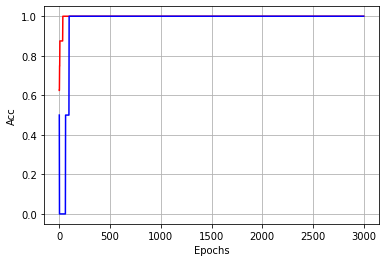

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(history.epoch)), history.history['acc'], color='red'  )
plt.plot(range(len(history.epoch)), history.history['val_acc'], color='blue'  )
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.grid()
plt.show()

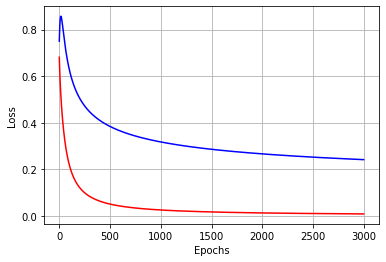

In [22]:
import matplotlib.pyplot as plt
plt.plot(range(len(history.epoch)), history.history['loss'], color='red'  )
plt.plot(range(len(history.epoch)), history.history['val_loss'], color='blue'  )
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()